# Extra Credit Project
### By Hao Xi, hx517
### Proposal is here
### https://www.authorea.com/215242/TNZEMJ9q8CgQ5rjc_CijCg

In [5]:
import os
import sys
import numpy as np
import pandas as pd
import time,datetime
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt 
from sklearn import preprocessing
import seaborn as sns  
import statsmodels.formula.api as smf
%matplotlib inline
from sklearn import linear_model

## 1. download data to PUIDATA

In [6]:
os.environ['PUIDATA']='/wingrdp/homedirs/hx517/PUIdata'
# http://aurorawu.lofter.com/post/18f005_6fd653 
# follow this
# set puidata env everytimes.

In [7]:
os.environ['PUIDATA']

'/wingrdp/homedirs/hx517/PUIdata'

In [8]:
os.getenv('PUIDATA')

'/wingrdp/homedirs/hx517/PUIdata'

In [9]:
def download(datestring):
    #getCitiBikeCSV(datestring)
    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.csv.zip")
    ###  To move it I use the os.system() functions to run bash commands with arguments
    os.system("mv " + datestring + "-citibike-tripdata.csv.zip " + os.getenv("PUIDATA"))
    ### unzip the csv 
    os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata..csvzip")

In [10]:
download('201704')

In [11]:
cb = pd.read_csv(os.getenv("PUIDATA") + "/201704-citibike-tripdata.csv.zip")

In [12]:
cb.shape

(1315404, 15)

In [13]:
cb.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [14]:
cb.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,195,2017-04-01 00:00:58,2017-04-01 00:04:14,217,Old Fulton St,40.702772,-73.993836,430,York St & Jay St,40.701485,-73.986569,25454,Subscriber,1966.0,1
1,585,2017-04-01 00:01:54,2017-04-01 00:11:40,490,8 Ave & W 33 St,40.751551,-73.993934,3158,W 63 St & Broadway,40.771639,-73.982614,25930,Subscriber,1995.0,1
2,665,2017-04-01 00:01:56,2017-04-01 00:13:01,504,1 Ave & E 16 St,40.732219,-73.981656,412,Forsyth St & Canal St,40.715816,-73.994224,27110,Subscriber,1987.0,1
3,262,2017-04-01 00:02:24,2017-04-01 00:06:47,445,E 10 St & Avenue A,40.727408,-73.981420,411,E 6 St & Avenue D,40.722281,-73.976687,28392,Subscriber,1961.0,1
4,134,2017-04-01 00:02:36,2017-04-01 00:04:50,3423,West Drive & Prospect Park West,40.661063,-73.979453,3300,Prospect Park West & 8 St,40.665147,-73.976376,19316,Subscriber,1967.0,2


In [15]:
weather = pd.read_csv(os.getenv("PUIDATA") + "/2017_weather.csv")

In [16]:
weather.head(2)

,Unnamed: 0,Conditions,Date,Dew Point,Events,Gust Speed,Heat Index,Humidity,Precip,Pressure,Temp.,Time (EDT),Time (EST),Visibility,Wind Dir,Wind Speed,Windchill
0,0,Overcast,"Jan. 01, 2017",25.0 °F,NaN,-,NaN,47%,NaN,29.89 in,44.1 °F,NaN,12:51 AM,10.0 mi,Variable,3.5 mph,42.5 °F
1,1,Overcast,"Jan. 01, 2017",26.1 °F,NaN,23.0 mph,NaN,49%,0.00 in,29.90 in,44.1 °F,NaN,1:51 AM,10.0 mi,West,4.6 mph,41.5 °F


In [17]:
weather['Time (EDT)']=weather['Time (EDT)'].fillna('')
weather['Time (EST)']=weather['Time (EST)'].fillna('')
weather['Time']=weather['Time (EDT)']+weather['Time (EST)']

In [18]:
wea=weather[['Conditions','Date','Temp.','Time','Visibility','Wind Speed','Humidity']]

In [19]:
wea['vis']=pd.to_numeric(wea['Visibility'].astype(str).str[:-3],errors='coerce')      # make columns numeric
wea['temp']=pd.to_numeric(wea['Temp.'].astype(str).str[:-3],errors='coerce')
wea['wind_speed']=pd.to_numeric(wea['Wind Speed'].astype(str).str[:-4],errors='coerce')
wea['humidity']=pd.to_numeric(wea['Humidity'].astype(str).str[:-1],errors='coerce')

wea.head()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

,Conditions,Date,Temp.,Time,Visibility,Wind Speed,Humidity,vis,temp,wind_speed,humidity
0,Overcast,"Jan. 01, 2017",44.1 °F,12:51 AM,10.0 mi,3.5 mph,47%,10.0,44.1,3.5,47.0
1,Overcast,"Jan. 01, 2017",44.1 °F,1:51 AM,10.0 mi,4.6 mph,49%,10.0,44.1,4.6,49.0
2,Overcast,"Jan. 01, 2017",45.0 °F,2:51 AM,10.0 mi,-,46%,10.0,45.0,NaN,46.0
3,Partly Cloudy,"Jan. 01, 2017",44.1 °F,3:51 AM,10.0 mi,10.4 mph,47%,10.0,44.1,10.4,47.0
4,Mostly Cloudy,"Jan. 01, 2017",45.0 °F,4:51 AM,10.0 mi,6.9 mph,44%,10.0,45.0,6.9,44.0


In [20]:
weather['datetime'] = weather["Date"].map(str) + " " + weather["Time"]         # create one-hour datetime column
weather['datetime'] = pd.to_datetime(weather['datetime'])

In [21]:
#weather.assign(rounded_dt=weather.datetime.dt.round('H'))
weather['datetime']=pd.to_datetime(weather.datetime.dt.date) + pd.to_timedelta(weather.datetime.dt.hour, unit='H')
weather.head()

,Unnamed: 0,Conditions,Date,Dew Point,Events,Gust Speed,Heat Index,Humidity,Precip,Pressure,Temp.,Time (EDT),Time (EST),Visibility,Wind Dir,Wind Speed,Windchill,Time,datetime
0,0,Overcast,"Jan. 01, 2017",25.0 °F,NaN,-,NaN,47%,NaN,29.89 in,44.1 °F,,12:51 AM,10.0 mi,Variable,3.5 mph,42.5 °F,12:51 AM,2017-01-01 00:00:00
1,1,Overcast,"Jan. 01, 2017",26.1 °F,NaN,23.0 mph,NaN,49%,0.00 in,29.90 in,44.1 °F,,1:51 AM,10.0 mi,West,4.6 mph,41.5 °F,1:51 AM,2017-01-01 01:00:00
2,2,Overcast,"Jan. 01, 2017",25.0 °F,NaN,-,NaN,46%,NaN,29.91 in,45.0 °F,,2:51 AM,10.0 mi,North,-,-,2:51 AM,2017-01-01 02:00:00
3,3,Partly Cloudy,"Jan. 01, 2017",25.0 °F,NaN,18.4 mph,NaN,47%,NaN,29.93 in,44.1 °F,,3:51 AM,10.0 mi,WSW,10.4 mph,38.6 °F,3:51 AM,2017-01-01 03:00:00
4,4,Mostly Cloudy,"Jan. 01, 2017",24.1 °F,NaN,-,NaN,44%,NaN,29.94 in,45.0 °F,,4:51 AM,10.0 mi,WSW,6.9 mph,41.2 °F,4:51 AM,2017-01-01 04:00:00


In [22]:
weather.isnull().sum()

Unnamed: 0       0
Conditions       0
Date             0
Dew Point        0
Events        4732
Gust Speed       0
Heat Index    4854
Humidity         0
Precip        4397
Pressure         0
Temp.            0
Time (EDT)       0
Time (EST)       0
Visibility       0
Wind Dir         0
Wind Speed       0
Windchill     2589
Time             0
datetime         0
dtype: int64

In [23]:
start='2017-04-01 00:00:00'
end='2017-04-30 23:00:00'

mask = (weather['datetime'] > start) & (weather['datetime'] <= end)

w9 = weather.loc[mask]


print("Shape: ",w9.shape)
w9.head()

Shape:  (916, 19)


,Unnamed: 0,Conditions,Date,Dew Point,Events,Gust Speed,Heat Index,Humidity,Precip,Pressure,Temp.,Time (EDT),Time (EST),Visibility,Wind Dir,Wind Speed,Windchill,Time,datetime
2733,2733,Overcast,"Apr. 01, 2017",36.0 °F,NaN,36.8 mph,NaN,93%,NaN,29.67 in,37.9 °F,1:51 AM,,5.0 mi,ENE,12.7 mph,30.0 °F,1:51 AM,2017-04-01 01:00:00
2734,2734,Overcast,"Apr. 01, 2017",36.0 °F,NaN,28.8 mph,NaN,96%,NaN,29.66 in,37.0 °F,2:51 AM,,6.0 mi,ENE,13.8 mph,28.5 °F,2:51 AM,2017-04-01 02:00:00
2735,2735,Overcast,"Apr. 01, 2017",36.0 °F,NaN,25.3 mph,NaN,96%,NaN,29.67 in,37.0 °F,3:31 AM,,2.5 mi,ENE,15.0 mph,28.1 °F,3:31 AM,2017-04-01 03:00:00
2736,2736,Overcast,"Apr. 01, 2017",36.0 °F,NaN,26.5 mph,NaN,96%,NaN,29.67 in,37.0 °F,3:38 AM,,3.0 mi,NE,16.1 mph,27.7 °F,3:38 AM,2017-04-01 03:00:00
2737,2737,Overcast,"Apr. 01, 2017",36.0 °F,NaN,21.9 mph,NaN,96%,NaN,29.65 in,37.0 °F,3:51 AM,,3.0 mi,Variable,6.9 mph,31.6 °F,3:51 AM,2017-04-01 03:00:00


## 2. descriptive analysis

Weather data

In [24]:
weather_dummy = pd.get_dummies(w9.Conditions,prefix = '',prefix_sep='')
w9 = w9.merge(weather_dummy, right_index = True, left_index  = True, how = 'outer')
w9.describe()    
# Note last column if 'unknown' which is 1 for just five rows

,Unnamed: 0,Clear,Haze,Heavy Rain,Light Rain,Mostly Cloudy,Overcast,Partly Cloudy,Rain,Scattered Clouds,Unknown
count,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000
mean,3190.500000,0.346070,0.010917,0.008734,0.077511,0.061135,0.413755,0.032751,0.025109,0.022926,0.001092
std,264.570721,0.475976,0.103969,0.093096,0.267546,0.239709,0.492775,0.178082,0.156542,0.149749,0.033041
min,2733.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2961.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3190.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3419.250000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,3648.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
w9.head()

,Unnamed: 0,Conditions,Date,Dew Point,Events,Gust Speed,Heat Index,Humidity,Precip,Pressure,...,Clear,Haze,Heavy Rain,Light Rain,Mostly Cloudy,Overcast,Partly Cloudy,Rain,Scattered Clouds,Unknown
2733,2733,Overcast,"Apr. 01, 2017",36.0 °F,NaN,36.8 mph,NaN,93%,NaN,29.67 in,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2734,2734,Overcast,"Apr. 01, 2017",36.0 °F,NaN,28.8 mph,NaN,96%,NaN,29.66 in,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2735,2735,Overcast,"Apr. 01, 2017",36.0 °F,NaN,25.3 mph,NaN,96%,NaN,29.67 in,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2736,2736,Overcast,"Apr. 01, 2017",36.0 °F,NaN,26.5 mph,NaN,96%,NaN,29.67 in,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2737,2737,Overcast,"Apr. 01, 2017",36.0 °F,NaN,21.9 mph,NaN,96%,NaN,29.65 in,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Text(0.5,0.98,'Histogram of wet hours per day, April 2017')

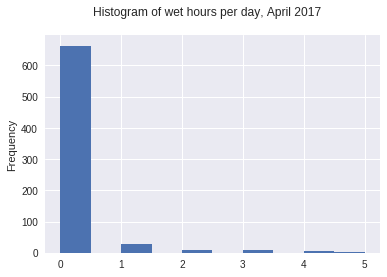

In [26]:
w9['Wet_hours']=w9['Heavy Rain']+w9['Rain']+w9['Light Rain']
w9.groupby(['datetime'])['Wet_hours'].sum().plot.hist()
plt.suptitle('Histogram of wet hours per day, April 2017')

fig1.

## 3.methodology

calculate speed

In [27]:
#通过经纬度计算距离的函数
def haversine(lon1, lat1, lon2, lat2): # 经度1，纬度1，经度2，纬度2 （十进制度数）  
    """ 
    Calculate the great circle distance between two points  
    on the earth (specified in decimal degrees) 
    """  
    # 将十进制度数转化为弧度  
    lon1= map(radians, np.array(lon1))  
    lat1= map(radians, np.array(lat1))
    lon2= map(radians, np.array(lon2))
    lat2= map(radians, np.array(lat2))
    lon1 = np.array(list(lon1)).reshape(-1,1)
    lon2 = np.array(list(lon2)).reshape(-1,1)
    lat1 = np.array(list(lat1)).reshape(-1,1)
    lat2 = np.array(list(lat2)).reshape(-1,1)
    # haversine公式  
    dlon = lon2 - lon1
    dlat = lat2 - lat1 

    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2  
    c = 2 * np.arcsin(np.sqrt(a))   
    r = 6371 # 地球平均半径，单位为公里  
    return c * r * 1000  

#计算每次骑行的米数并增加骑行距离字段
cb["meter"]=haversine(cb["start station longitude"],cb["start station latitude"],cb["end station longitude"],cb["end station latitude"])

#将原数据表中的骑行时间由秒转化为小时
cb["duration_hour"]=cb["tripduration"]/3600
#将米转化为公里并与小时计算出速度
cb["speed"]=cb["meter"]/1000/cb["duration_hour"]

In [28]:
cb.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,meter,duration_hour,speed
0,195,2017-04-01 00:00:58,2017-04-01 00:04:14,217,Old Fulton St,40.702772,-73.993836,430,York St & Jay St,40.701485,-73.986569,25454,Subscriber,1966.0,1,629.055437,0.054167,11.613331
1,585,2017-04-01 00:01:54,2017-04-01 00:11:40,490,8 Ave & W 33 St,40.751551,-73.993934,3158,W 63 St & Broadway,40.771639,-73.982614,25930,Subscriber,1995.0,1,2428.585524,0.162500,14.945142
2,665,2017-04-01 00:01:56,2017-04-01 00:13:01,504,1 Ave & E 16 St,40.732219,-73.981656,412,Forsyth St & Canal St,40.715816,-73.994224,27110,Subscriber,1987.0,1,2109.137769,0.184722,11.417889
3,262,2017-04-01 00:02:24,2017-04-01 00:06:47,445,E 10 St & Avenue A,40.727408,-73.981420,411,E 6 St & Avenue D,40.722281,-73.976687,28392,Subscriber,1961.0,1,695.769460,0.072778,9.560191
4,134,2017-04-01 00:02:36,2017-04-01 00:04:50,3423,West Drive & Prospect Park West,40.661063,-73.979453,3300,Prospect Park West & 8 St,40.665147,-73.976376,19316,Subscriber,1967.0,2,522.978063,0.037222,14.050157


weather in september

In [29]:
wea.head()

,Conditions,Date,Temp.,Time,Visibility,Wind Speed,Humidity,vis,temp,wind_speed,humidity
0,Overcast,"Jan. 01, 2017",44.1 °F,12:51 AM,10.0 mi,3.5 mph,47%,10.0,44.1,3.5,47.0
1,Overcast,"Jan. 01, 2017",44.1 °F,1:51 AM,10.0 mi,4.6 mph,49%,10.0,44.1,4.6,49.0
2,Overcast,"Jan. 01, 2017",45.0 °F,2:51 AM,10.0 mi,-,46%,10.0,45.0,NaN,46.0
3,Partly Cloudy,"Jan. 01, 2017",44.1 °F,3:51 AM,10.0 mi,10.4 mph,47%,10.0,44.1,10.4,47.0
4,Mostly Cloudy,"Jan. 01, 2017",45.0 °F,4:51 AM,10.0 mi,6.9 mph,44%,10.0,45.0,6.9,44.0


In [30]:
wea['datetime'] = wea["Date"].map(str) + " " + weather["Time"]         # create one-hour datetime column
wea['datetime'] = pd.to_datetime(wea['datetime'])

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [31]:
wea['datetime']=pd.to_datetime(wea.datetime.dt.date) + pd.to_timedelta(wea.datetime.dt.hour, unit='H')

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [32]:
wea.head()

,Conditions,Date,Temp.,Time,Visibility,Wind Speed,Humidity,vis,temp,wind_speed,humidity,datetime
0,Overcast,"Jan. 01, 2017",44.1 °F,12:51 AM,10.0 mi,3.5 mph,47%,10.0,44.1,3.5,47.0,2017-01-01 00:00:00
1,Overcast,"Jan. 01, 2017",44.1 °F,1:51 AM,10.0 mi,4.6 mph,49%,10.0,44.1,4.6,49.0,2017-01-01 01:00:00
2,Overcast,"Jan. 01, 2017",45.0 °F,2:51 AM,10.0 mi,-,46%,10.0,45.0,NaN,46.0,2017-01-01 02:00:00
3,Partly Cloudy,"Jan. 01, 2017",44.1 °F,3:51 AM,10.0 mi,10.4 mph,47%,10.0,44.1,10.4,47.0,2017-01-01 03:00:00
4,Mostly Cloudy,"Jan. 01, 2017",45.0 °F,4:51 AM,10.0 mi,6.9 mph,44%,10.0,45.0,6.9,44.0,2017-01-01 04:00:00


In [33]:
start='2017-04-01 00:00:00'
end='2017-04-30 23:00:00'

mask = (wea['datetime'] > start) & (wea['datetime'] <= end)

wea = wea.loc[mask]


print("Shape: ",wea.shape)
wea.head()

Shape:  (916, 12)


,Conditions,Date,Temp.,Time,Visibility,Wind Speed,Humidity,vis,temp,wind_speed,humidity,datetime
2733,Overcast,"Apr. 01, 2017",37.9 °F,1:51 AM,5.0 mi,12.7 mph,93%,5.0,37.9,12.7,93.0,2017-04-01 01:00:00
2734,Overcast,"Apr. 01, 2017",37.0 °F,2:51 AM,6.0 mi,13.8 mph,96%,6.0,37.0,13.8,96.0,2017-04-01 02:00:00
2735,Overcast,"Apr. 01, 2017",37.0 °F,3:31 AM,2.5 mi,15.0 mph,96%,2.5,37.0,15.0,96.0,2017-04-01 03:00:00
2736,Overcast,"Apr. 01, 2017",37.0 °F,3:38 AM,3.0 mi,16.1 mph,96%,3.0,37.0,16.1,96.0,2017-04-01 03:00:00
2737,Overcast,"Apr. 01, 2017",37.0 °F,3:51 AM,3.0 mi,6.9 mph,96%,3.0,37.0,6.9,96.0,2017-04-01 03:00:00


In [34]:
wea.columns

Index(['Conditions', 'Date', 'Temp.', 'Time', 'Visibility', 'Wind Speed',
       'Humidity', 'vis', 'temp', 'wind_speed', 'humidity', 'datetime'],
      dtype='object')

In [35]:
wea.drop([ 'Date', 'Temp.', 'Time', 'Visibility', 'Wind Speed',
       'Humidity'], axis=1,inplace=True)

In [36]:
wea.head()

,Conditions,vis,temp,wind_speed,humidity,datetime
2733,Overcast,5.0,37.9,12.7,93.0,2017-04-01 01:00:00
2734,Overcast,6.0,37.0,13.8,96.0,2017-04-01 02:00:00
2735,Overcast,2.5,37.0,15.0,96.0,2017-04-01 03:00:00
2736,Overcast,3.0,37.0,16.1,96.0,2017-04-01 03:00:00
2737,Overcast,3.0,37.0,6.9,96.0,2017-04-01 03:00:00


In [37]:
cb['timebyhour'] = pd.to_datetime(cb['starttime'])

In [38]:
cb['timebyhour']=pd.to_datetime(cb.timebyhour.dt.date) + pd.to_timedelta(cb.timebyhour.dt.hour, unit='H')

In [39]:
cb.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,meter,duration_hour,speed,timebyhour
0,195,2017-04-01 00:00:58,2017-04-01 00:04:14,217,Old Fulton St,40.702772,-73.993836,430,York St & Jay St,40.701485,-73.986569,25454,Subscriber,1966.0,1,629.055437,0.054167,11.613331,2017-04-01
1,585,2017-04-01 00:01:54,2017-04-01 00:11:40,490,8 Ave & W 33 St,40.751551,-73.993934,3158,W 63 St & Broadway,40.771639,-73.982614,25930,Subscriber,1995.0,1,2428.585524,0.162500,14.945142,2017-04-01
2,665,2017-04-01 00:01:56,2017-04-01 00:13:01,504,1 Ave & E 16 St,40.732219,-73.981656,412,Forsyth St & Canal St,40.715816,-73.994224,27110,Subscriber,1987.0,1,2109.137769,0.184722,11.417889,2017-04-01
3,262,2017-04-01 00:02:24,2017-04-01 00:06:47,445,E 10 St & Avenue A,40.727408,-73.981420,411,E 6 St & Avenue D,40.722281,-73.976687,28392,Subscriber,1961.0,1,695.769460,0.072778,9.560191,2017-04-01
4,134,2017-04-01 00:02:36,2017-04-01 00:04:50,3423,West Drive & Prospect Park West,40.661063,-73.979453,3300,Prospect Park West & 8 St,40.665147,-73.976376,19316,Subscriber,1967.0,2,522.978063,0.037222,14.050157,2017-04-01


In [40]:
cb.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'usertype',
       'birth year', 'gender', 'meter', 'duration_hour'], axis=1,inplace=True)

In [41]:
cb.tail()

,bikeid,speed,timebyhour
1315399,28149,14.377207,2017-04-30 23:00:00
1315400,17125,10.614445,2017-04-30 23:00:00
1315401,27471,15.171315,2017-04-30 23:00:00
1315402,28184,3.471338,2017-04-30 23:00:00
1315403,26889,6.834931,2017-04-30 23:00:00


In [42]:
df=pd.merge(cb,wea,left_on="timebyhour",right_on="datetime")

In [43]:
df.dropna()
df.head()

,bikeid,speed,timebyhour,Conditions,vis,temp,wind_speed,humidity,datetime
0,20853,11.188138,2017-04-01 01:00:00,Overcast,5.0,37.9,12.7,93.0,2017-04-01 01:00:00
1,27686,7.327618,2017-04-01 01:00:00,Overcast,5.0,37.9,12.7,93.0,2017-04-01 01:00:00
2,27030,10.389187,2017-04-01 01:00:00,Overcast,5.0,37.9,12.7,93.0,2017-04-01 01:00:00
3,14857,9.266277,2017-04-01 01:00:00,Overcast,5.0,37.9,12.7,93.0,2017-04-01 01:00:00
4,16034,14.652283,2017-04-01 01:00:00,Overcast,5.0,37.9,12.7,93.0,2017-04-01 01:00:00


In [44]:
df1 = df.iloc[:,4:8]
df1.head()

,vis,temp,wind_speed,humidity
0,5.0,37.9,12.7,93.0
1,5.0,37.9,12.7,93.0
2,5.0,37.9,12.7,93.0
3,5.0,37.9,12.7,93.0
4,5.0,37.9,12.7,93.0


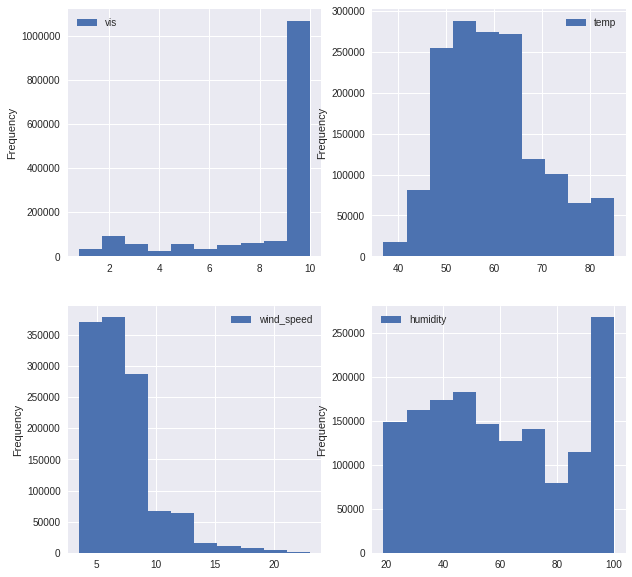

In [45]:
fig = plt.figure(figsize=(10,10))

for i,c in enumerate(df1.columns):
    ax = fig.add_subplot(2,2,i+1)
    df1[c].plot(kind='hist')
    #pl.hist(morning[c], bins=range(0,110,5))
    plt.legend()

### then run the regression

In [46]:
df.wind_speed.fillna(method='ffill',inplace=True)       # fill NAs with last value
df.temp.fillna(method='ffill',inplace=True)              # fill NAs with last value
df.humidity.fillna(method='ffill',inplace=True) 
df.vis.fillna(method='ffill',inplace=True) 

In [47]:
df.isnull().sum()

bikeid        0
speed         0
timebyhour    0
Conditions    0
vis           0
temp          0
wind_speed    0
humidity      0
datetime      0
dtype: int64

In [48]:
lm = smf.ols(formula='speed ~ vis', data = df).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  speed   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                 1.690e+04
Date:                Fri, 15 Dec 2017   Prob (F-statistic):               0.00
Time:                        02:59:26   Log-Likelihood:            -4.0889e+06
No. Observations:             1545718   AIC:                         8.178e+06
Df Residuals:                 1545716   BIC:                         8.178e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     10.0679      0.009   1103.414      0.0

The R-squared is 0.011 which is small, so it seems 'Visibility' has no correlation to 'speed'.

In [49]:
lm = smf.ols(formula='speed ~ temp', data = df).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  speed   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                 4.064e+04
Date:                Fri, 15 Dec 2017   Prob (F-statistic):               0.00
Time:                        02:59:27   Log-Likelihood:            -4.0772e+06
No. Observations:             1545718   AIC:                         8.154e+06
Df Residuals:                 1545716   BIC:                         8.154e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     12.2257      0.017    739.116      0.0

The R-squared is 0.026 which is small, so it seems 'Visibility' has no correlation to 'speed'.

In [50]:
lm = smf.ols(formula='speed ~ wind_speed', data = df).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  speed   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1272.
Date:                Fri, 15 Dec 2017   Prob (F-statistic):          2.04e-278
Time:                        02:59:28   Log-Likelihood:            -4.0967e+06
No. Observations:             1545718   AIC:                         8.193e+06
Df Residuals:                 1545716   BIC:                         8.193e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      9.1635      0.007   1321.869      0.0

In [51]:
lm = smf.ols(formula='speed ~ humidity', data = df).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  speed   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                 3.556e+04
Date:                Fri, 15 Dec 2017   Prob (F-statistic):               0.00
Time:                        02:59:29   Log-Likelihood:            -4.0797e+06
No. Observations:             1545718   AIC:                         8.159e+06
Df Residuals:                 1545716   BIC:                         8.159e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.6712      0.007   1059.088      0.0

### The R-squared all is too small. so try Seaborn multiply package.

In [ ]:
df.head()

,bikeid,speed,timebyhour,Conditions,vis,temp,wind_speed,humidity,datetime
0,20853,11.188138,2017-04-01 01:00:00,Overcast,5.0,37.9,12.7,93.0,2017-04-01 01:00:00
1,27686,7.327618,2017-04-01 01:00:00,Overcast,5.0,37.9,12.7,93.0,2017-04-01 01:00:00
2,27030,10.389187,2017-04-01 01:00:00,Overcast,5.0,37.9,12.7,93.0,2017-04-01 01:00:00
3,14857,9.266277,2017-04-01 01:00:00,Overcast,5.0,37.9,12.7,93.0,2017-04-01 01:00:00
4,16034,14.652283,2017-04-01 01:00:00,Overcast,5.0,37.9,12.7,93.0,2017-04-01 01:00:00


In [ ]:
sns.pairplot(df, x_vars=['vis','temp','wind_speed','humidity'], y_vars='speed', size=7, aspect=0.8, kind='reg')  
plt.show() 

In [ ]:
X = df[['vis', 'temp', 'wind_speed','humidity']]  
y = df['speed'] 

In [ ]:
from sklearn.cross_validation import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=1)  
print X_train.shape  
print y_train.shape  
print X_test.shape  
print y_test.shape  

In [ ]:
from sklearn.linear_model import LinearRegression  
linreg = LinearRegression()  
model=linreg.fit(X_train, y_train)  
print model  
print linreg.intercept_  
print linreg.coef_  

In [ ]:
zip(feature_cols, linreg.coef_)  

In [ ]:
y_pred = linreg.predict(X_test)  
print y_pred

### test it

In [ ]:
print type(y_pred),type(y_test)  
print len(y_pred),len(y_test)  
print y_pred.shape,y_test.shape  
from sklearn import metrics  
import numpy as np  
sum_mean=0  
for i in range(len(y_pred)):  
    sum_mean+=(y_pred[i]-y_test.values[i])**2  
sum_erro=np.sqrt(sum_mean/50)  
# calculate RMSE by hand  
print "RMSE by hand:",sum_erro  

In [ ]:
import matplotlib.pyplot as plt  
plt.figure()  
plt.plot(range(len(y_pred)),y_pred,'b',label="predict")  
plt.plot(range(len(y_pred)),y_test,'r',label="test")  
plt.legend(loc="upper right")
plt.show()  

fig. The red line is the true value curve, the blue is the predicted value curve